In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

#for tf1
# from tensorflow.examples.tutorials.mnist import input_data
# mnist=input_data.read_data_sets("MNIST_data")

#for tf2
# import tensorflow_datasets
# mnist = tensorflow_datasets.load('mnist', download = True, with_info = False)

#from HW2
from sklearn.model_selection import train_test_split
mnist = tf.keras.datasets.mnist.load_data()

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# tf.enable_eager_execution()

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2
%autosave 60



Instructions for updating:
non-resource variables are not supported in the long term


Autosaving every 60 seconds


In [2]:
#Load Dataset

# from sklearn.model_selection import train_test_split
# data_train, data_test = tf.keras.datasets.mnist.load_data()

# # separate a validation set
# x_train, y_train = data_train 
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, stratify=y_train)

# x_test, y_test = data_test

# # treating images as vectors and create one hot representations of labesl

# x_train = x_train.reshape([-1, 28 * 28])
# x_val = x_val.reshape([-1, 28 * 28])
# x_test = x_test.reshape([-1, 28 * 28])

# y_train = tf.one_hot(y_train, depth=10).numpy()
# y_val = tf.one_hot(y_val, depth=10).numpy()
# y_test = tf.one_hot(y_test, depth=10).numpy()


# print('Shape of training input: ', x_train.shape)
# print('Shape of training labels: ', y_train.shape)
# print('Shape of validation input: ', x_val.shape)
# print('Shape of validation labels: ', y_val.shape)
# print('Shape of test input: ', x_test.shape)
# print('Shape of test labels: ', y_test.shape)



In [3]:
# #my models

# def Discriminator():
#     model = keras.Sequential()
#     model.add(keras.layers.BatchNormalization())
#     model.add(keras.layers.Dense(units = 10, activation = 'sigmoid'))
#     model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))
    
#     return model

# def Generator():
#     model = keras.Sequential()
#     model.add(keras.layers.Dense(units = 10, activation = 'sigmoid'))
#     model.add(keras.layers.Dense(units = 784, activation = 'sigmoid'))

#     return model

In [40]:
#from https://towardsdatascience.com/generative-adversarial-networks-using-tensorflow-c8f4518406df

def generator(z,reuse=None):
    with tf.variable_scope('gen',reuse=reuse):
        hidden1=tf.layers.dense(inputs=z,units=128,activation=tf.nn.leaky_relu)
        hidden2=tf.layers.dense(inputs=hidden1,units=128,activation=tf.nn.leaky_relu)
        output=tf.layers.dense(inputs=hidden2,units=784,activation=tf.nn.tanh)
        
        return output
    
def discriminator(X,reuse=None):
    with tf.variable_scope('dis',reuse=reuse):
        hidden1=tf.layers.dense(inputs=X,units=128,activation=tf.nn.leaky_relu)
        hidden2=tf.layers.dense(inputs=hidden1,units=128,activation=tf.nn.leaky_relu)
        logits=tf.layers.dense(hidden2,units=1)
        output=tf.sigmoid(logits)
        
        return output,logits

In [41]:
tf.compat.v1.reset_default_graph()

real_images=tf.placeholder(tf.float32,shape=[None,784])
z=tf.placeholder(tf.float32,shape=[None,100])

G=generator(z)
D_output_real,D_logits_real=discriminator(real_images)
D_output_fake,D_logits_fake=discriminator(G,reuse=True)

In [42]:
def loss_func(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

D_real_loss=loss_func(D_logits_real,tf.ones_like(D_logits_real)*0.9) #Smoothing for generalization
D_fake_loss=loss_func(D_logits_fake,tf.zeros_like(D_logits_real))
D_loss=D_real_loss+D_fake_loss

G_loss= loss_func(D_logits_fake,tf.ones_like(D_logits_fake))

In [43]:
lr=0.001

#Do this when multiple networks interact with each other
tvars=tf.trainable_variables()  #returns all variables created(the two variable scopes) and makes trainable true
d_vars=[var for var in tvars if 'dis' in var.name]
g_vars=[var for var in tvars if 'gen' in var.name]

D_trainer=tf.train.AdamOptimizer(lr).minimize(D_loss,var_list=d_vars)
G_trainer=tf.train.AdamOptimizer(lr).minimize(G_loss,var_list=g_vars)

batch_size=100
epochs=100
init=tf.global_variables_initializer()

(60000, 28, 28)
on epoch0
on epoch1
on epoch2
on epoch3
on epoch4
on epoch5
on epoch6
on epoch7
on epoch8
on epoch9
on epoch10
on epoch11
on epoch12
on epoch13
on epoch14
on epoch15
on epoch16
on epoch17
on epoch18
on epoch19
on epoch20
on epoch21
on epoch22
on epoch23
on epoch24
on epoch25
on epoch26
on epoch27
on epoch28
on epoch29
on epoch30
on epoch31
on epoch32
on epoch33
on epoch34
on epoch35
on epoch36
on epoch37
on epoch38
on epoch39
on epoch40
on epoch41
on epoch42
on epoch43
on epoch44
on epoch45
on epoch46
on epoch47
on epoch48
on epoch49
on epoch50
on epoch51
on epoch52
on epoch53
on epoch54
on epoch55
on epoch56
on epoch57
on epoch58
on epoch59
on epoch60
on epoch61
on epoch62
on epoch63
on epoch64
on epoch65
on epoch66
on epoch67
on epoch68
on epoch69
on epoch70
on epoch71
on epoch72
on epoch73
on epoch74
on epoch75
on epoch76
on epoch77
on epoch78
on epoch79
on epoch80
on epoch81
on epoch82
on epoch83
on epoch84
on epoch85
on epoch86
on epoch87
on epoch88
on epoch89
on e

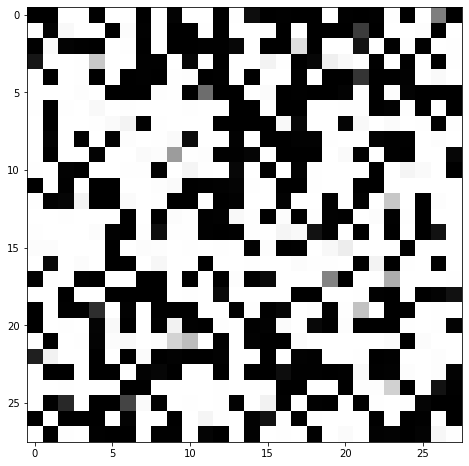

In [44]:
samples=[] #generator examples

# print(type(mnist))
# # print(mnist.keys())
# print(mnist[0][0][69])

(x_train, y_train), (x_test, y_test) = mnist
# print(type(x_train))
# print(x_train[1])
print(np.shape(x_train))


with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        num_batches=np.shape(x_train)[0]//batch_size
        for i in range(num_batches):
#             batch=mnist.train.next_batch(batch_size)
            batch = x_train[i*batch_size:(i+1)*batch_size]
#             print('bs = ',np.shape(batch[0]))
            batch_images=batch[0:batch_size].reshape((batch_size,784))
            batch_images=batch_images*2-1
            batch_z=np.random.uniform(-1,1,size=(batch_size,100))
            _=sess.run(D_trainer,feed_dict={real_images:batch_images,z:batch_z})
            _=sess.run(G_trainer,feed_dict={z:batch_z})
            
        print("on epoch{}".format(epoch))
        
        sample_z=np.random.uniform(-1,1,size=(1,100))
        gen_sample=sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
        
        samples.append(gen_sample)

plt.imshow(samples[0].reshape(28,28))

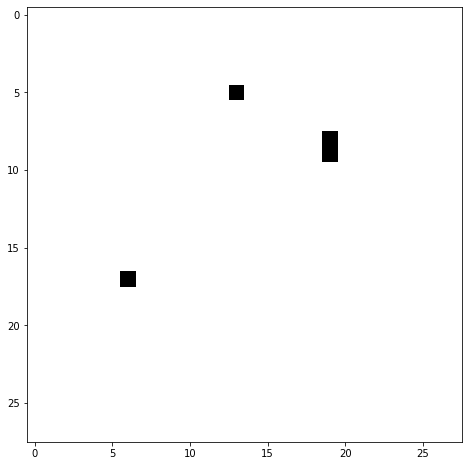

In [49]:
plt.imshow(samples[-1].reshape(28,28))

In [ ]:
# from vis_utils import visualize_grid

# # fake = fake.reshape([fake.shape[0], 28, 28, 1])
# fake = samples[-1].reshape([1,28,28,1])

# plt.imshow(visualize_grid(fake))

In [ ]:
# d = Discriminator()
# g = Generator()

# x_train = tf.convert_to_tensor(x_train)
# x_train = tf.cast(x_train, tf.float32)

# train = x_train[0:10,:]
# print(np.shape(train))

# d.predict(train);

In [ ]:
seed = np.random.rand(1,1)
fake = g.predict(seed);



In [ ]:
tes = mnist['train']
tes.keys()